<a href="https://colab.research.google.com/github/jaekyoungkim/tensor2ml_NLP/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%99%80_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9C%BC%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC(ch3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# github저장소에서 파일 받을수 있음
!git clone https://github.com/NLP-kr/tensorflow-ml-nlp-tf2.git

Cloning into 'tensorflow-ml-nlp-tf2'...
remote: Enumerating objects: 1720, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 1720 (delta 45), reused 11 (delta 5), pack-reused 1631
Receiving objects: 100% (1720/1720), 201.21 MiB | 30.76 MiB/s, done.
Resolving deltas: 100% (1035/1035), done.
Checking out files: 100% (88/88), done.


# 3. ch3

In [ ]:
# 자연어 처리 개요
# 큰 태스크 4개 : 텍스트 분류, 텍스트 유사도, 텍스트 생성, 기계이해

In [ ]:
# 단어표현 word representation분야
# 원핫 인코딩 : sparse하다는 문제
# 벡터의 크기가 작으면서도 벡터가 단어의 의미를 표현할수있는 방법이 필요 (분포가설을 기반으로 한다 , 분포가설은 같은 문맥의 단어, 즉 비슷한 위치에 나오는 단어는 비슷한 의미를 가진다는 개념)
# 두가지 방법이 있음 : 문맥안에서 단어들이 동시에 등장하는 횟수를 직접세는 카운트기반 , 신경망등을 통해 문맥안의 단어들을 예측하는 예측 방법
# 

In [ ]:
# 카운트 기반 방법 : SVD, LSA, HAL, HELIINGER PCA
# 예측방법 : WORD2VEC, NNLM(Neural network language model), RNNLM

In [ ]:
# WORD2VEC의 경우, 일반적으로 SKIP -GRAM의 성능이 좋아 일반적인경우, SKIP-GRAM을 사용
# GLOVE : 예측방법 + 카운트방법 동시에 사용하는 방법

In [ ]:
# 텍스트 분류 
# - BINARY CLASSIFICATION : 스팸분류, 감정분류
# - MULTI CLASS CLASSIFICATION : 뉴스 기사 분류

In [ ]:
# 대표적인 지도학습의 예 : 나이브 베이즈 분류, 서포트 벡터 머신, 신경망, 선형분류, 로지스틱 분류, 랜덤포레스트
# 비지도 학습을 통한 분류 : K-MEANS CLUSTERING, 계층적 군집화

In [ ]:
# 텍스트 유사도 : 코사인 유사도, 맨해튼 유사도, 자카드 유사도, 유클리디언 유사도 등이 있음
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
sent = ('휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.', ' 폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.')
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent)
idf= tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf)))

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니다': 1.0, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
idf

array([1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
       1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
       1.40546511, 1.        , 1.40546511, 1.        , 1.40546511,
       1.40546511, 1.        ])

In [ ]:
# 자카드 유사도 : 두문장을 각각 단어의 집합으로 만든 뒤 두 집합을 통해 유사도를 측정하는 방빗ㄱ
# 교집합인 공통된단어의개수 / 합집합 단어의 수 (0~1사이의 값)
# 코사인 유사도 : -1~1사이의 값 , 유사도를 계산할때 가장 널리 쓰이는 방법중 하나, 두 벡터간의 각도를 구하는것이라서 방향성의 개념이 더해짐
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2]) #첫문장과 두번째 문장 비교

array([[0.17952266]])

In [ ]:
tfidf_matrix[0:1]

<1x17 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_matrix[1:2]

<1x17 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [ ]:
# 유클리디안 유사도 : 기본적인 거리를 측정하는 유사도 공식 L2거리라고도 불림
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])
# 값을 정규화해줘야할 필요가 있어보임

array([[1.28099753]])

In [ ]:
import numpy as np

def l1_normalize(v):
  norm = np.sum(v)
  return v / norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])


array([[0.20491229]])

In [ ]:
tfidf_norm_l1

<2x17 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [ ]:
# 맨하튼 유사도 L1 DISTANCE라고함
from sklearn.metrics.pairwise import manhattan_distances
manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.77865927]])

In [ ]:
# 자연어 생성 : 파파고, 구글 번역기
# 기계 이해 :  메모리 네트워크를 통해 가능, 자연어 처리 기술에 대한 개념이 총망라된 학습 태스크 어렵고 더욱 복잡한 모델링을 필요로함
# QA , SQUAD, bAbI(FACEBOOK  연구팀 20가지 부류의 질문내용으로 구성)
# EXACT MATCH(EM) : 정답 위치와 완벽하게 일치하는지를 봄
# F1 : 정답위치와 겹치는지를 봄
# VQA (Visual question answering)


In [ ]:
# 데이터 이해하기 
import os
import re
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras import utils 
data_set = tf.keras.utils.get_file(fname='imdb.tar.gz', origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", extract =True)

84131840/84125825 [==============================] - 5s 0us/step


In [ ]:
 def directory_data(directory):
   data = {}
   data["review"] =[] # review라는 컬럼 만듦
   for file_path in os.listdir(directory):
     with open(os.path.join(directory, file_path), "r") as file:
       data['review'].append(file.read())
   return pd.DataFrame.from_dict(data)


def data(directory):
  pos_df =directory_data(os.path.join(directory, "pos"))
  neg_df =directory_data(os.path.join(directory, "neg"))
  pos_df['sentiment'] = 1
  neg_df['sentiment'] = 0

  return pd.concat([pos_df, neg_df])


In [ ]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [ ]:
train_df.head()

,review,sentiment
0,"Good, funny, straightforward story, excellent ...",1
1,I was hardly aware of the time in history depi...,1
2,This is the last Dutch language film Paul Verh...,1
3,"After the failure of ""The Crusades"" at the box...",1
4,"Shintarô Katsu, who played the blind swordsman...",1


In [ ]:
test_df.head()

,review,sentiment
0,"with that, carry the same dark weaknesses we a...",1
1,An extremely dark and brooding show with an ex...,1
2,This movie shocked me. It was so realistic and...,1
3,I've loved this movie since I was a little kid...,1
4,"A year after her triumphant first special, ""My...",1


In [ ]:
reviews= list(train_df['review']);reviews  #  각문장을 리스트로 담고있음, 

['Good, funny, straightforward story, excellent Nicole Kidman (I almost always like the movies she\'s in). This was a good "vehicle" for someone adept at comedy and drama since there are elements of both. A romantic comedy wrapped around two crime stories, great closing lines. Chaplin, very good here, was also good in another good, but unpopular romantic comedy ("Truth about Cats & Dogs"). Maybe they\'re too implausible. Ebert didn\'t even post a review for this. The great "screwball" comedies obviously were totally implausible ("Bringing up Baby", etc.). If you\'ve seen one implausible comedy, you\'ve seen them all? Or maybe people are ready to move on from the 1930s. Weird. Birthday Girl is a movie I\'ve enjoyed several times. Nicole Kidman may be the "killer app" for home video.',
 "I was hardly aware of the time in history depicted in this 1971 Brazilian black comedy, however that is not to say it wasn't accessible to me because the movie makes it very clear. It's set in 16th centu

In [ ]:
tokenized_reviews =[r.split() for r in reviews] ; tokenized_reviews #  각 문장의 단어단위로 토큰을 뽑아냄

In [ ]:
review_len_by_token = [len(t) for t in tokenized_reviews] ; len(review_len_by_token) # 총 25000문장에 대해서 각각의 길이를 출력함

25000

In [ ]:
max(review_len_by_token) # 최대길이는 2470

2470

In [ ]:
# 토크나이징된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ','')) for s in reviews]; review_len_by_eumjeol

[657,
 2289,
 1192,
 2321,
 479,
 2428,
 1609,
 2751,
 199,
 1875,
 203,
 993,
 1112,
 758,
 173,
 594,
 1554,
 407,
 1429,
 3066,
 2037,
 1853,
 616,
 1127,
 874,
 531,
 1180,
 492,
 3232,
 307,
 3378,
 952,
 1064,
 642,
 3930,
 577,
 1681,
 993,
 424,
 815,
 571,
 1393,
 812,
 714,
 528,
 725,
 175,
 1360,
 4531,
 604,
 563,
 773,
 1535,
 709,
 635,
 595,
 1482,
 1698,
 894,
 551,
 817,
 196,
 3437,
 536,
 1408,
 945,
 610,
 262,
 531,
 1827,
 1505,
 415,
 430,
 831,
 944,
 539,
 536,
 1271,
 1675,
 1239,
 2007,
 364,
 864,
 283,
 466,
 515,
 581,
 738,
 692,
 637,
 1407,
 482,
 667,
 2309,
 660,
 656,
 719,
 485,
 885,
 3141,
 278,
 1336,
 572,
 692,
 538,
 1139,
 622,
 2786,
 980,
 2678,
 411,
 218,
 766,
 1995,
 1734,
 952,
 303,
 3819,
 3999,
 2100,
 640,
 505,
 538,
 218,
 561,
 634,
 218,
 838,
 543,
 1428,
 1746,
 582,
 749,
 606,
 624,
 215,
 845,
 127,
 781,
 968,
 1720,
 2893,
 1253,
 759,
 625,
 935,
 497,
 918,
 495,
 675,
 2438,
 551,
 1612,
 236,
 705,
 1577,
 694,
 630

In [ ]:
max(review_len_by_eumjeol)

11235

In [ ]:
 review_len_by_eumjeol[1] # 음절의 개수

2289

In [ ]:
review_len_by_token[1] # token화했을때의 단어개수

448

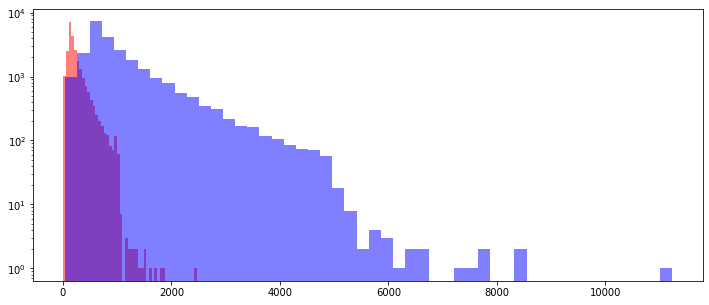

In [ ]:
#문장에 대한 길이 분포를 아래와 같이 확인 가능
import matplotlib.pyplot as plt
# figsize : (가로, 세로) 형태의 튜플 입력
plt.figure(figsize=(12,5))
plt.hist(review_len_by_token, bins=50, alpha =0.5, color= 'r', label ='word') # 단어개수에 대한 분포
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label ='alphabet') # 알파베 개수에 대한 분포
plt.yscale('log', nonposy= 'clip')

In [ ]:
import numpy as np
print('문장 최대길이 :{}'.format(np.max(review_len_by_token)))
print('문장 최소길이 :{}'.format(np.min(review_len_by_token)))
print('문장 평균길이 :{}'.format(np.mean(review_len_by_token)))
print('문장 1사분위 길이 :{}'.format(np.percentile(review_len_by_token, 25)))
print('문장 3사분위 길이 :{}'.format(np.percentile(review_len_by_token, 75)))


문장 최대길이 :2470
문장 최소길이 :10
문장 평균길이 :233.7872
문장 1사분위 길이 :127.0
문장 3사분위 길이 :284.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f780bb80a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f780b278990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780b95ccd0>],
 'means': [<matplotlib.lines.Line2D at 0x7f780b95c090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f780b95ca90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f780bb93390>,
  <matplotlib.lines.Line2D at 0x7f780bb93f10>]}

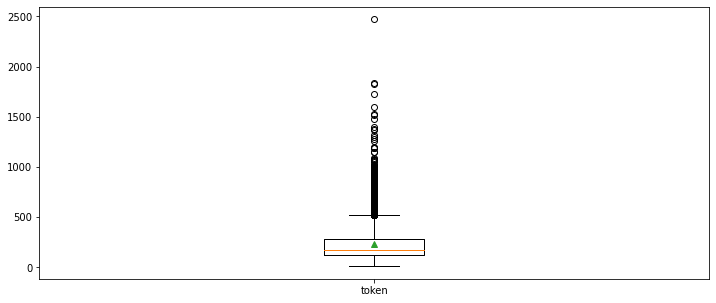

In [ ]:
# box plot 그리기
plt.figure(figsize= (12,5))
plt.boxplot([review_len_by_token], labels=['token'], showmeans=True) # 초록점이 평균

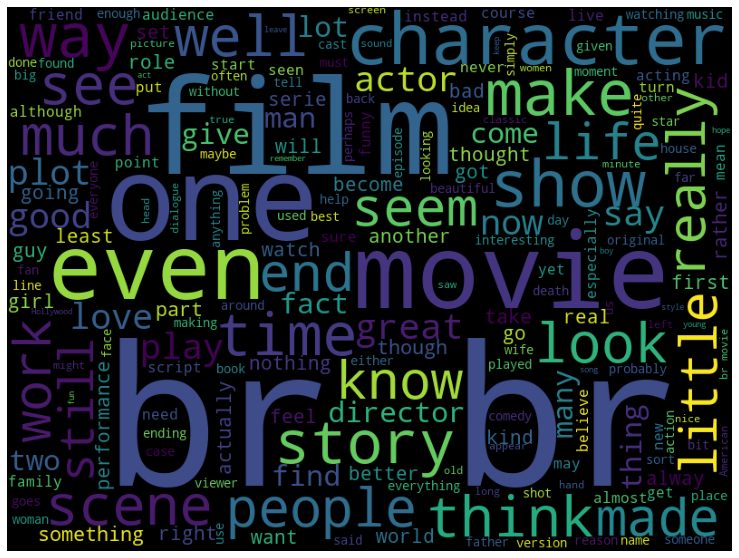

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(stopwords = STOPWORDS, background_color= 'black', width = 800, height=600).generate(' '.join(train_df['review']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() # br 이 엄청 많은것을 확인 가능

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


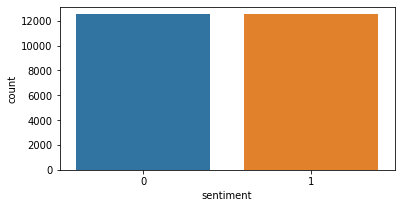

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sentiment = train_df['sentiment'].value_counts;sentiment

fig,axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'])

In [ ]:
train_df['sentiment'].head(3)

0    1
1    1
2    1
Name: sentiment, dtype: int64